# Unsupervised Machine Learning: Clustering

## Table of Contents:

### 1. Importing Libraries and Data and Renaming Columns

### 2. The Elbow Technique

### 3. K-Means Clustering
    Descriptive Statistics

## 1. Importing Libraries and Data and Renaming Columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
#Show matplotlib visuals

%matplotlib inline

In [3]:
#Create a path

path = r'C:\Users\dyl41\Documents\Quality of Life Project'

In [4]:
#Import the dataset

df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'QualityofLife2.csv'), index_col = False)

In [5]:
#Check the dataset

df.head()

,Rank,Country,Stability,Rights,Health,Safety,Climate,Costs,Popularity,TotalQualityofLife,Quality of Life Ranking
0,1,Australia,86,92,87,100,90,23,41,76,Best Quality of Life
1,2,San Marino,81,82,91,87,62,61,47,74,Best Quality of Life
2,3,Hong Kong,77,85,100,97,49,61,41,74,Best Quality of Life
3,4,Switzerland,91,99,93,99,34,44,46,74,Best Quality of Life
4,5,Macao,90,71,100,93,48,61,44,73,Best Quality of Life


In [6]:
# Remove the categorical columns and create a subset for numerical variables

df_subset = df.drop(columns = ['Country', 'Quality of Life Ranking'])

In [7]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Rank                137 non-null    int64
 1   Stability           137 non-null    int64
 2   Rights              137 non-null    int64
 3   Health              137 non-null    int64
 4   Safety              137 non-null    int64
 5   Climate             137 non-null    int64
 6   Costs               137 non-null    int64
 7   Popularity          137 non-null    int64
 8   TotalQualityofLife  137 non-null    int64
dtypes: int64(9)
memory usage: 9.8 KB


In [8]:
column1 = ['Rank', 'Stability', 'Rights', 'Health', 'Safety', 'Climate', 'Costs', 'Popularity', 'TotalQualityofLife']

In [9]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_subset), columns=column1)
df_scaled.head()

,Rank,Stability,Rights,Health,Safety,Climate,Costs,Popularity,TotalQualityofLife
0,-1.719454,1.475922,1.649202,1.110703,1.069423,1.848698,-2.536038,0.251691,1.954151
1,-1.694168,1.216290,1.250013,1.264561,0.470667,0.440795,0.748194,0.751426,1.769772
2,-1.668882,1.008585,1.369770,1.610743,0.931249,-0.212874,0.748194,0.251691,1.769772
3,-1.643596,1.735554,1.928634,1.341491,1.023365,-0.967107,-0.721067,0.668137,1.769772
4,-1.618310,1.683628,0.810906,1.610743,0.747016,-0.263156,0.748194,0.501559,1.677582


In [10]:
df_subset.head()

,Rank,Stability,Rights,Health,Safety,Climate,Costs,Popularity,TotalQualityofLife
0,1,86,92,87,100,90,23,41,76
1,2,81,82,91,87,62,61,47,74
2,3,77,85,100,97,49,61,41,74
3,4,91,99,93,99,34,44,46,74
4,5,90,71,100,93,48,61,44,73


## 2. The Elbow Technique

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\dyl41\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[-1232.9999999999998,
 -694.5037290497247,
 -550.5574627078436,
 -494.8978550998655,
 -437.4128475598072,
 -401.49566316821733,
 -369.20650005251355,
 -338.1828069145217,
 -317.802105626707]

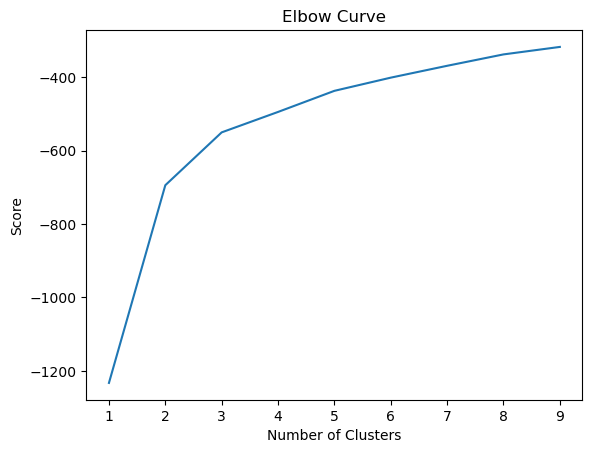

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

<B>The elbow seems to break around 3 clusters, so I will select 3 as the optimal number

## 3. K-Means Clustering

In [14]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [15]:
# Fit the k-means object to the data.

kmeans.fit(df_scaled)

KMeans(n_clusters=3)

In [16]:
df_scaled['clusters'] = kmeans.fit_predict(df_scaled)

In [17]:
df_scaled.head()

,Rank,Stability,Rights,Health,Safety,Climate,Costs,Popularity,TotalQualityofLife,clusters
0,-1.719454,1.475922,1.649202,1.110703,1.069423,1.848698,-2.536038,0.251691,1.954151,0
1,-1.694168,1.216290,1.250013,1.264561,0.470667,0.440795,0.748194,0.751426,1.769772,0
2,-1.668882,1.008585,1.369770,1.610743,0.931249,-0.212874,0.748194,0.251691,1.769772,0
3,-1.643596,1.735554,1.928634,1.341491,1.023365,-0.967107,-0.721067,0.668137,1.769772,0
4,-1.618310,1.683628,0.810906,1.610743,0.747016,-0.263156,0.748194,0.501559,1.677582,0


In [18]:
df_scaled['clusters'].value_counts()

2    47
1    47
0    43
Name: clusters, dtype: int64

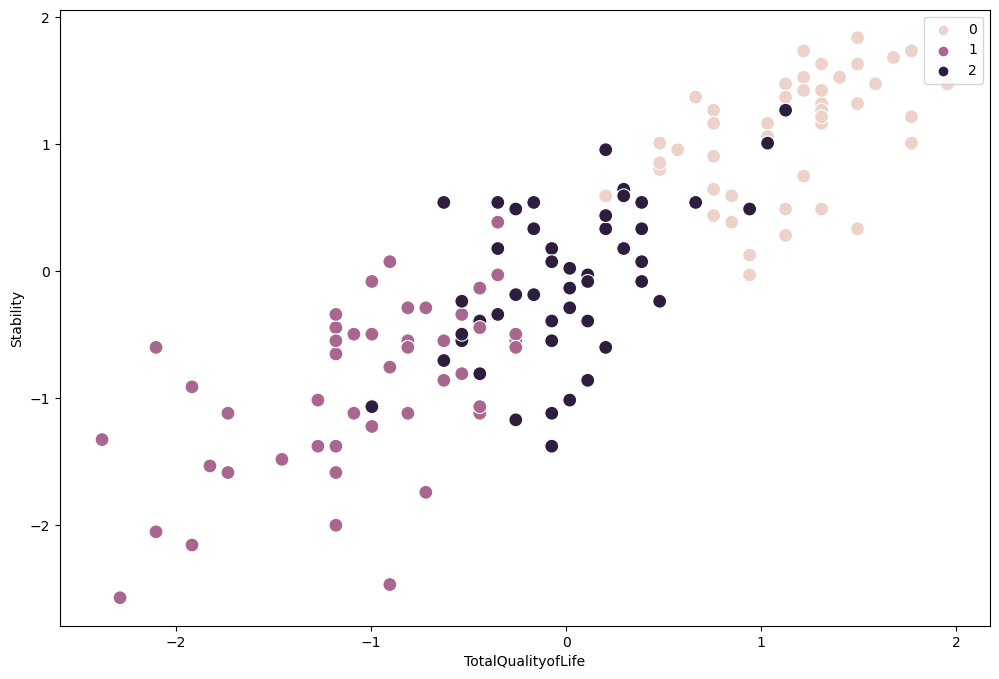

In [19]:
# Plot the clusters for the "Total Quality of Life Score" and "Stability" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['TotalQualityofLife'], y=df_scaled['Stability'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('TotalQualityofLife') # Label x-axis.
plt.ylabel('Stability') # Label y-axis.
plt.show()

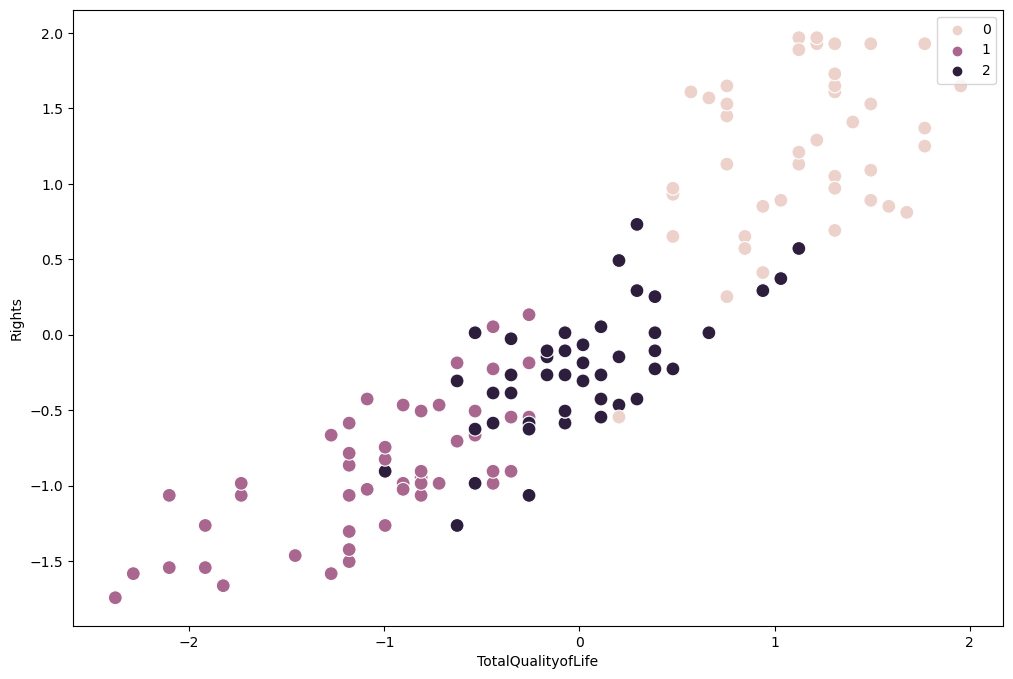

In [20]:
# Plot the clusters for the "Total Quality of Life Score" and "Rights" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['TotalQualityofLife'], y=df_scaled['Rights'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('TotalQualityofLife') # Label x-axis.
plt.ylabel('Rights') # Label y-axis.
plt.show()

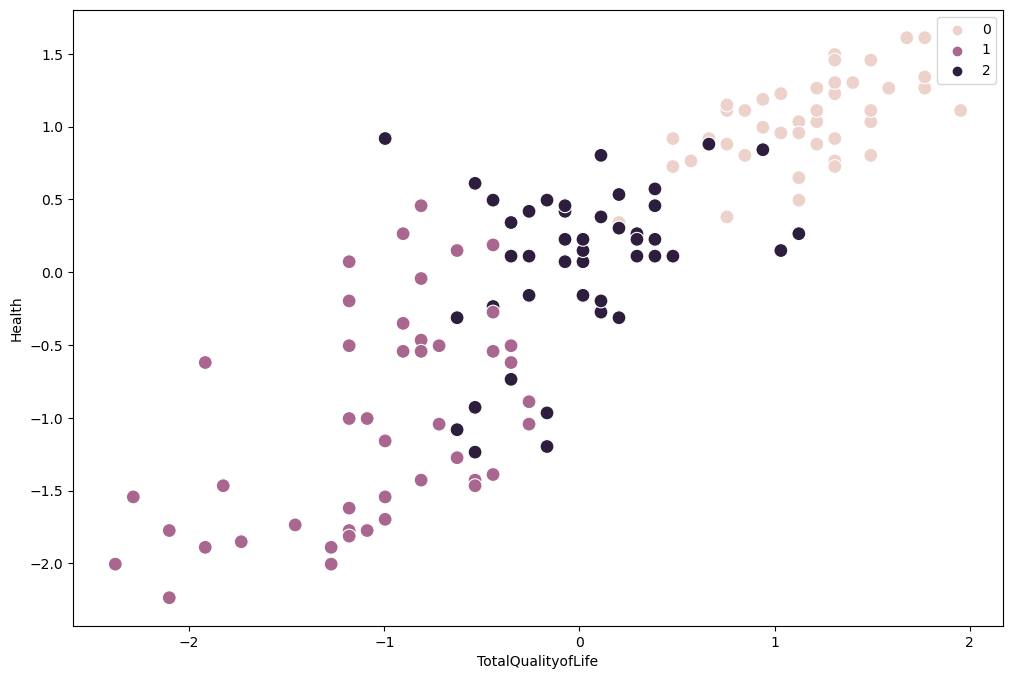

In [21]:
# Plot the clusters for the "Total Quality of Life Score" and "Health" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['TotalQualityofLife'], y=df_scaled['Health'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('TotalQualityofLife') # Label x-axis.
plt.ylabel('Health') # Label y-axis.
plt.show()

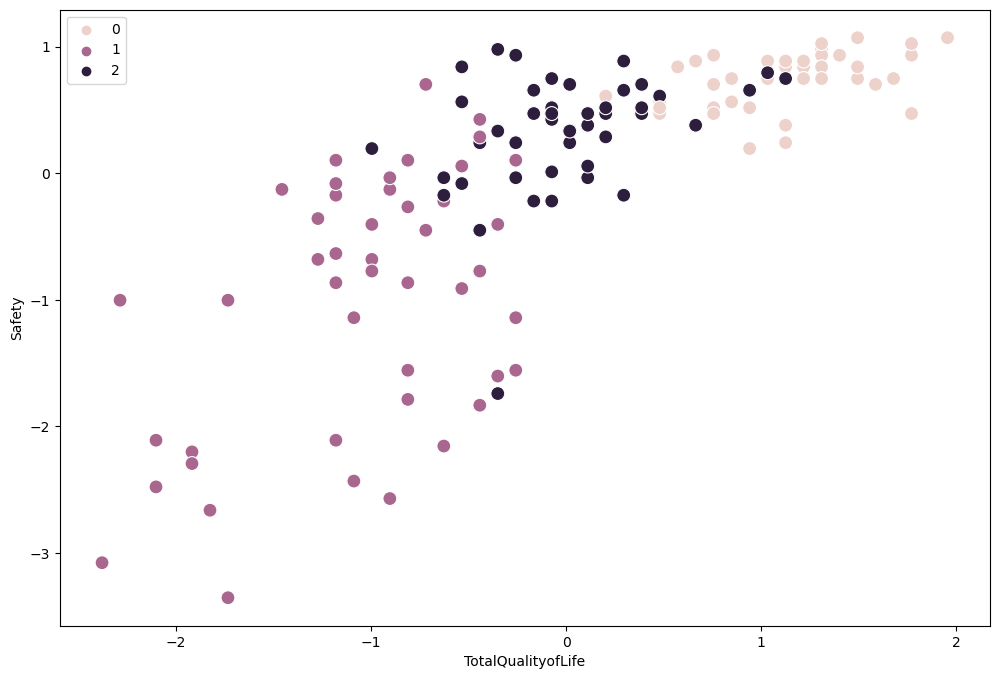

In [22]:
# Plot the clusters for the "Total Quality of Life Score" and "Safety" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['TotalQualityofLife'], y=df_scaled['Safety'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('TotalQualityofLife') # Label x-axis.
plt.ylabel('Safety') # Label y-axis.
plt.show()

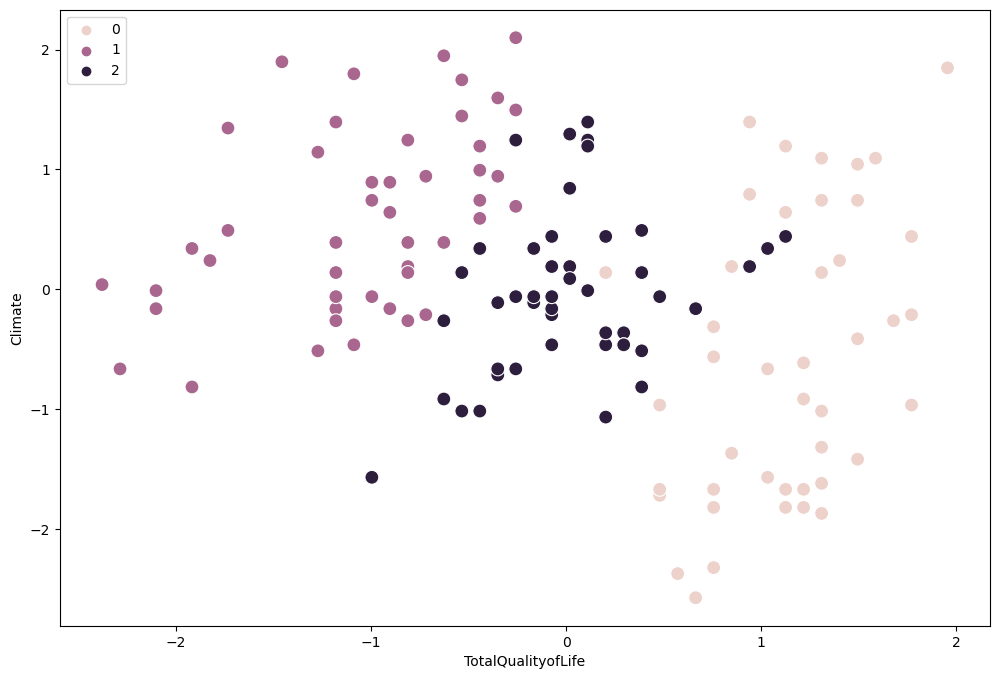

In [23]:
# Plot the clusters for the "Total Quality of Life Score" and "Climate" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['TotalQualityofLife'], y=df_scaled['Climate'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('TotalQualityofLife') # Label x-axis.
plt.ylabel('Climate') # Label y-axis.
plt.show()

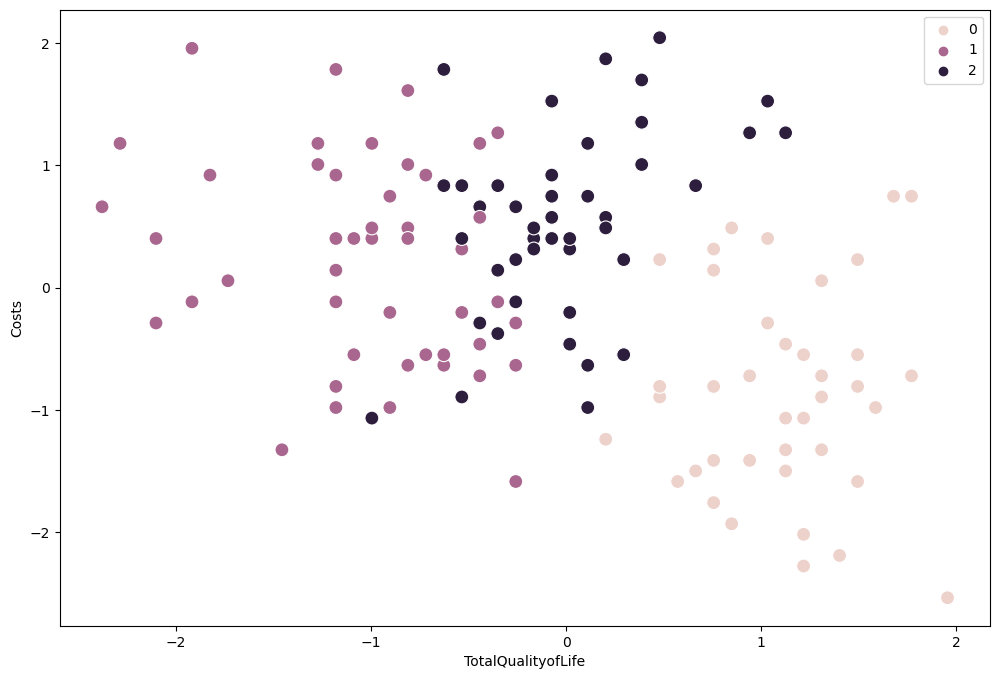

In [24]:
# Plot the clusters for the "Total Quality of Life Score" and "Costs" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['TotalQualityofLife'], y=df_scaled['Costs'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('TotalQualityofLife') # Label x-axis.
plt.ylabel('Costs') # Label y-axis.
plt.show()

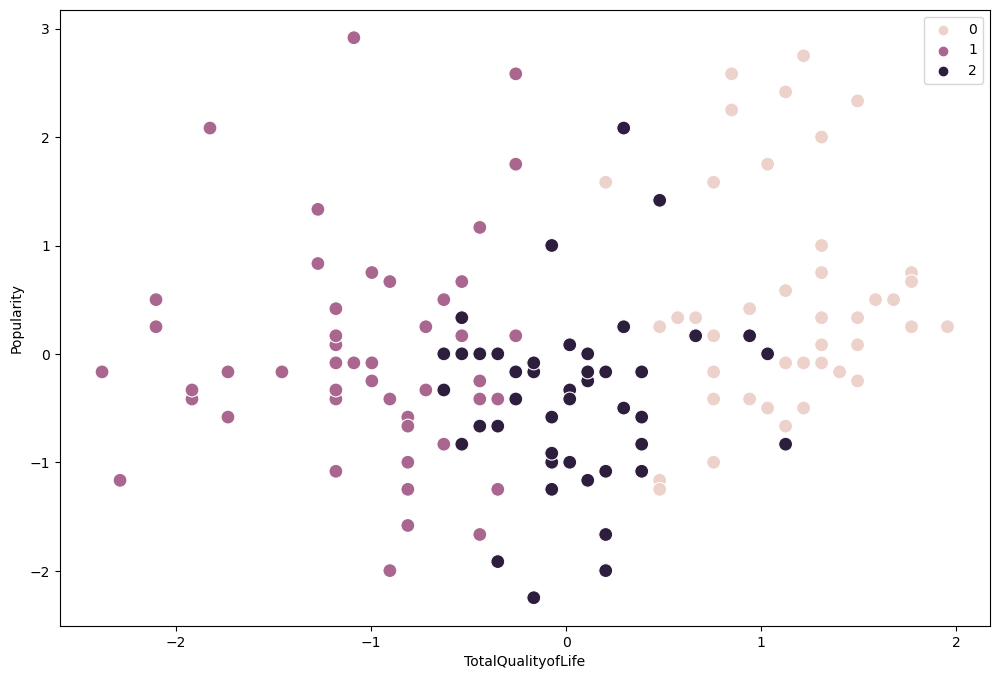

In [25]:
# Plot the clusters for the "Total Quality of Life Score" and "Popularity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['TotalQualityofLife'], y=df_scaled['Popularity'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('TotalQualityofLife') # Label x-axis.
plt.ylabel('Popularity') # Label y-axis.
plt.show()

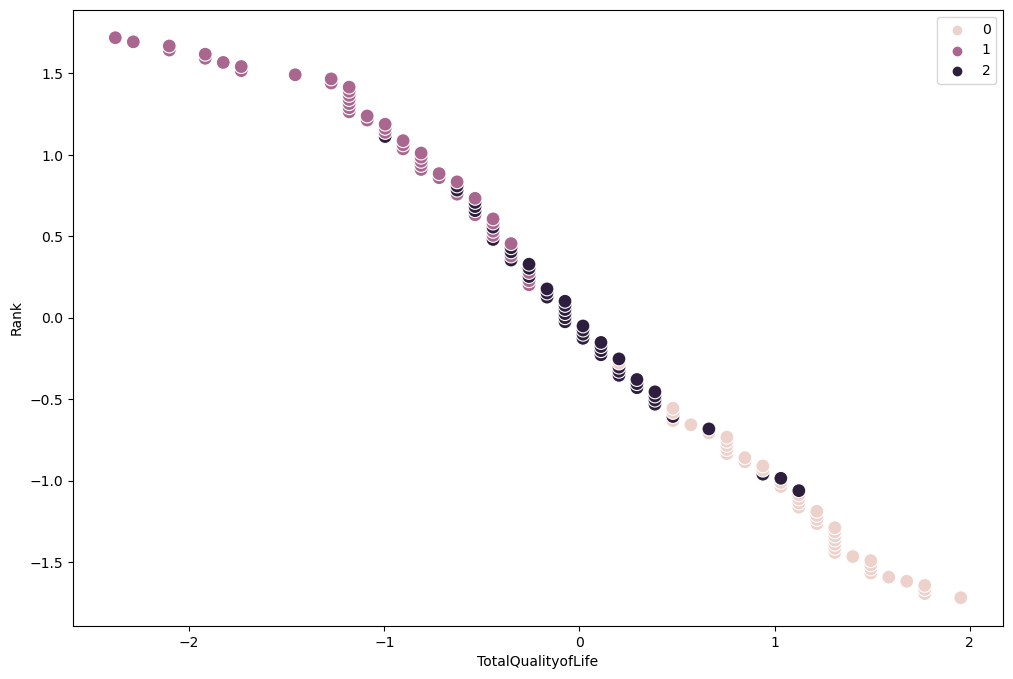

In [26]:
# Plot the clusters for the "Total Quality of Life Score" and "Rank" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['TotalQualityofLife'], y=df_scaled['Rank'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('TotalQualityofLife') # Label x-axis.
plt.ylabel('Rank') # Label y-axis.
plt.show()

### <B>Interpretation of Results:
    
The first four variables, stability, rights, health, and safety, all seemed to have a direct relationship with total quality of life, as they would increase simultaneously; however, when it came to climate, costs, and popularity, there did not appear to be a strong correlation with total quality of life. These variables appeared to stay level across the chart without a discernable pattern. Oddly enough, when it came to costs, a few outliers showed that even with more expensive costs, there was still a high quality of life. I did not get any useful information from rank because these categories are essentially the same.

### <B> Descriptive Statistics

In [27]:
df_scaled.loc[df_scaled['clusters'] == 2, 'cluster'] = 'dark purple'
df_scaled.loc[df_scaled['clusters'] == 1, 'cluster'] = 'light purple'
df_scaled.loc[df_scaled['clusters'] == 0, 'cluster'] = 'pink'

In [28]:
df_scaled.groupby('cluster').agg({'Stability':['mean', 'median'], 
                         'Rights':['mean', 'median'], 
                         'Health':['mean', 'median'],
                          'Safety':['mean', 'median']})

Stability              Rights              Health            \
                  mean    median      mean    median      mean    median   
cluster                                                                    
dark purple  -0.064192 -0.081869 -0.226134 -0.266903  0.086069  0.149086   
light purple -0.917111 -0.756912 -0.904755 -0.945523 -1.028588 -1.043319   
pink          1.072587  1.164364  1.236088  1.250013  1.030195  1.033773   

                Safety            
                  mean    median  
cluster                           
dark purple   0.337393  0.470667  
light purple -1.020833 -0.865019  
pink          0.747016  0.747016

<B>Descriptive Stats Reflection:
 
The pink cluster seems to be the healthiest in terms of evenness across all metrics. The Safety variable has the largest mean and median of the four, making it a top variable for analysis. Rights, stability, and health would follow in respective order, which would likely coincide with how people would consider themselves to have a better quality of life.
    
One limitation with the set is the size and that it only reflects a single year. It would be worth investigating the same metrics over the course of several years to see how countries move around in the rankings.

In [29]:
df_scaled.tail()

,Rank,Stability,Rights,Health,Safety,Climate,Costs,Popularity,TotalQualityofLife,clusters,cluster
132,1.618310,-0.912691,-1.264874,-1.889542,-2.292822,0.340231,-0.116077,-0.331333,-1.917814,1,light purple
133,1.643596,-2.055072,-1.065280,-1.774148,-2.477054,-0.011745,0.402486,0.251691,-2.102193,1,light purple
134,1.668882,-0.601133,-1.544306,-2.235724,-2.108589,-0.162591,-0.288932,0.501559,-2.102193,1,light purple
135,1.694168,-2.574336,-1.584225,-1.543360,-1.003193,-0.665414,1.180330,-1.164224,-2.286572,1,light purple
136,1.719454,-1.328102,-1.743900,-2.004936,-3.075810,0.038537,0.661767,-0.164754,-2.378762,1,light purple


In [30]:
df_scaled

,Rank,Stability,Rights,Health,Safety,Climate,Costs,Popularity,TotalQualityofLife,clusters,cluster
0,-1.719454,1.475922,1.649202,1.110703,1.069423,1.848698,-2.536038,0.251691,1.954151,0,pink
1,-1.694168,1.216290,1.250013,1.264561,0.470667,0.440795,0.748194,0.751426,1.769772,0,pink
2,-1.668882,1.008585,1.369770,1.610743,0.931249,-0.212874,0.748194,0.251691,1.769772,0,pink
3,-1.643596,1.735554,1.928634,1.341491,1.023365,-0.967107,-0.721067,0.668137,1.769772,0,pink
4,-1.618310,1.683628,0.810906,1.610743,0.747016,-0.263156,0.748194,0.501559,1.677582,0,pink
...,...,...,...,...,...,...,...,...,...,...,...
132,1.618310,-0.912691,-1.264874,-1.889542,-2.292822,0.340231,-0.116077,-0.331333,-1.917814,1,light purple
133,1.643596,-2.055072,-1.065280,-1.774148,-2.477054,-0.011745,0.402486,0.251691,-2.102193,1,light purple
134,1.668882,-0.601133,-1.544306,-2.235724,-2.108589,-0.162591,-0.288932,0.501559,-2.102193,1,light purple
135,1.694168,-2.574336,-1.584225,-1.543360,-1.003193,-0.665414,1.180330,-1.164224,-2.286572,1,light purple


In [ ]:
# Export the dataset

df_scaled.to_csv(os.path.join (path, 'Data', 'Prepared Data', 'clusteringQOL.csv'))